# How are in-demand skills trending for Data Analysts

Methodology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [1]:
import pandas as pd
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

In [2]:
#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [3]:
#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
#Filter data based on Data Analysts in United States
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == "United States")].copy()
df_da_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [5]:
#Extracting the month from date column
df_da_us['job_posted_month_no'] = df_da_us['job_posted_date'].dt.month
df_da_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,11
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}",3
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin...",6
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p...",8
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']...",9
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']},10
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['...",7
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,1


In [6]:
df_da_us_explode = df_da_us.explode('job_skills')
df_da_us_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,11
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,r,"{'programming': ['r'], 'sync': ['zoom']}",3
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,zoom,"{'programming': ['r'], 'sync': ['zoom']}",3
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,word,"{'analyst_tools': ['word', 'excel', 'powerpoin...",6
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,excel,"{'analyst_tools': ['word', 'excel', 'powerpoin...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc",excel,"{'analyst_tools': ['excel'], 'programming': ['...",7
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,1
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,sql,"{'analyst_tools': ['tableau'], 'programming': ...",1
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,python,"{'analyst_tools': ['tableau'], 'programming': ...",1


In [8]:
#Pivot the data based on the Job Posted Month Number and the Job Skills to find the count of each skill by the month
df_da_us_pivot = df_da_us_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_da_us_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,assembly,atlassian,aurora,aws,azure,bash,bigquery,bitbucket,blazor,c,c#,c++,capacitor,cassandra,chainer,chef,clickup,clojure,cobol,codecommit,cognos,colocation,confluence,cordova,couchbase,couchdb,crystal,css,dart,databricks,...,sqlserver,ssis,ssrs,svelte,svn,swift,symphony,t-sql,tableau,tensorflow,terminal,terraform,theano,tidyr,tidyverse,trello,twilio,typescript,ubuntu,unify,unity,unix,unreal,vb.net,vba,visio,visual basic,vmware,vue,vue.js,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,42,10,1,400,363,31,101,35,0,173,77,103,1,7,0,5,0,0,7,1,154,1,111,1,2,0,117,36,3,106,...,1,167,188,0,1,8,6,84,2488,26,32,5,0,0,2,6,0,2,0,8,10,127,0,7,257,191,63,4,1,0,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,28,9,4,314,287,11,55,3,1,111,88,57,0,7,0,5,0,0,4,0,100,0,57,2,0,0,95,32,2,66,...,0,176,164,0,0,13,0,57,1676,12,32,3,0,0,2,4,3,0,0,4,3,50,0,6,164,148,79,2,9,0,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,25,12,4,292,248,19,58,0,0,100,54,66,0,10,0,0,3,0,6,0,119,1,78,3,0,0,78,36,0,47,...,1,108,126,0,0,10,0,75,1804,13,26,4,0,0,2,1,4,0,0,9,3,63,1,9,188,127,78,3,6,0,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,11,11,7,317,233,27,51,10,0,100,52,96,0,12,0,5,0,3,12,0,103,0,60,0,0,1,82,26,0,68,...,0,112,129,0,0,16,0,72,1789,9,34,5,0,0,1,2,0,1,0,12,4,47,0,6,211,133,75,8,4,0,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,19,4,10,210,182,9,36,4,1,105,78,67,0,3,0,0,0,1,10,0,92,0,49,1,0,0,76,23,1,62,...,0,87,86,0,3,4,2,55,1432,8,32,2,0,0,0,2,0,1,6,9,5,23,0,0,134,137,49,3,3,0,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,22,8,5,281,240,29,39,8,0,101,74,52,0,10,0,1,0,0,10,0,97,1,50,8,3,0,77,39,4,85,...,2,131,125,0,1,6,1,57,1628,7,17,3,0,0,2,0,0,5,0,17,3,65,0,4,192,160,45,6,1,0,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,20,12,13,274,228,12,53,9,0,105,37,65,0,10,0,1,0,0,8,0,105,0,52,2,0,0,68,23,1,76,...,1,82,117,0,1,2,2,46,1533,18,23,4,0,1,4,1,0,3,0,3,6,28,1,5,170,132,41,5,1,0,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,28,17,26,349,250,18,65,13,0,170,62,94,0,3,0,2,0,2,0,0,118,0,68,1,1,0,81,34,3,85,...,1,110,148,0,0,7,7,73,1951,26,22,1,0,0,5,3,0,0,2,7,7,54,0,3,237,162,34,5,0,0,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,16,7,17,265,190,14,33,6,0,104,41,60,0,7,0,2,0,0,9,0,77,0,38,3,3,0,59,30,1,61,...,0,70,101,0,3,3,2,35,1353,12,14,5,0,0,0,1,2,2,0,2,8,34,1,2,127,101,41,6,1,1,0,4,80,4,478,0,0,0,1,12


In [9]:
df_da_us_pivot.loc['Total'] = df_da_us_pivot.sum()
df_da_us_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,assembly,atlassian,aurora,aws,azure,bash,bigquery,bitbucket,blazor,c,c#,c++,capacitor,cassandra,chainer,chef,clickup,clojure,cobol,codecommit,cognos,colocation,confluence,cordova,couchbase,couchdb,crystal,css,dart,databricks,...,sqlserver,ssis,ssrs,svelte,svn,swift,symphony,t-sql,tableau,tensorflow,terminal,terraform,theano,tidyr,tidyverse,trello,twilio,typescript,ubuntu,unify,unity,unix,unreal,vb.net,vba,visio,visual basic,vmware,vue,vue.js,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,42,10,1,400,363,31,101,35,0,173,77,103,1,7,0,5,0,0,7,1,154,1,111,1,2,0,117,36,3,106,...,1,167,188,0,1,8,6,84,2488,26,32,5,0,0,2,6,0,2,0,8,10,127,0,7,257,191,63,4,1,0,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,28,9,4,314,287,11,55,3,1,111,88,57,0,7,0,5,0,0,4,0,100,0,57,2,0,0,95,32,2,66,...,0,176,164,0,0,13,0,57,1676,12,32,3,0,0,2,4,3,0,0,4,3,50,0,6,164,148,79,2,9,0,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,25,12,4,292,248,19,58,0,0,100,54,66,0,10,0,0,3,0,6,0,119,1,78,3,0,0,78,36,0,47,...,1,108,126,0,0,10,0,75,1804,13,26,4,0,0,2,1,4,0,0,9,3,63,1,9,188,127,78,3,6,0,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,11,11,7,317,233,27,51,10,0,100,52,96,0,12,0,5,0,3,12,0,103,0,60,0,0,1,82,26,0,68,...,0,112,129,0,0,16,0,72,1789,9,34,5,0,0,1,2,0,1,0,12,4,47,0,6,211,133,75,8,4,0,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,19,4,10,210,182,9,36,4,1,105,78,67,0,3,0,0,0,1,10,0,92,0,49,1,0,0,76,23,1,62,...,0,87,86,0,3,4,2,55,1432,8,32,2,0,0,0,2,0,1,6,9,5,23,0,0,134,137,49,3,3,0,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,22,8,5,281,240,29,39,8,0,101,74,52,0,10,0,1,0,0,10,0,97,1,50,8,3,0,77,39,4,85,...,2,131,125,0,1,6,1,57,1628,7,17,3,0,0,2,0,0,5,0,17,3,65,0,4,192,160,45,6,1,0,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,20,12,13,274,228,12,53,9,0,105,37,65,0,10,0,1,0,0,8,0,105,0,52,2,0,0,68,23,1,76,...,1,82,117,0,1,2,2,46,1533,18,23,4,0,1,4,1,0,3,0,3,6,28,1,5,170,132,41,5,1,0,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,28,17,26,349,250,18,65,13,0,170,62,94,0,3,0,2,0,2,0,0,118,0,68,1,1,0,81,34,3,85,...,1,110,148,0,0,7,7,73,1951,26,22,1,0,0,5,3,0,0,2,7,7,54,0,3,237,162,34,5,0,0,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,16,7,17,265,190,14,33,6,0,104,41,60,0,7,0,2,0,0,9,0,77,0,38,3,3,0,59,30,1,61,...,0,70,101,0,3,3,2,35,1353,12,14,5,0,0,0,1,2,2,0,2,8,34,1,2,127,101,41,6,1,1,0,4,80,4,478,0,0,0,1,12


In [13]:
#Sorting the columns by their name based on the count in the total row
df_da_us_pivot = df_da_us_pivot[df_da_us_pivot.loc['Total'].sort_values(ascending=False).index]
df_da_us_pivot

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,sql server,flow,aws,sap,go,snowflake,azure,outlook,sharepoint,spss,jira,alteryx,vba,java,looker,javascript,hadoop,visio,ssrs,qlik,c,spark,ssis,spreadsheet,sheets,cognos,mysql,ms access,databricks,windows,...,datarobot,redhat,sqlserver,elixir,nuix,heroku,ruby on rails,lua,unreal,erlang,mlr,svelte,electron,laravel,blazor,shogun,yarn,colocation,clickup,f#,tidyr,hugging face,next.js,vue.js,kotlin,ionic,xamarin,gtx,fastapi,microsoft lists,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,575,514,400,386,443,289,363,306,286,321,349,206,257,236,230,216,243,191,188,189,173,170,167,188,151,154,128,146,106,80,...,2,1,1,0,0,2,1,0,0,0,1,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,405,414,314,278,286,281,287,224,232,182,183,203,164,148,157,150,160,148,164,159,111,105,176,129,79,100,103,113,66,92,...,0,0,0,0,0,0,0,0,0,0,1,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,343,304,292,281,271,247,248,248,238,204,206,219,188,143,179,139,156,127,126,119,100,99,108,102,78,119,91,117,47,76,...,0,0,1,0,0,1,0,2,1,0,1,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,361,328,317,313,336,280,233,219,217,206,194,208,211,195,144,155,163,133,129,138,100,138,112,101,104,103,112,98,68,86,...,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,306,265,210,305,282,200,182,183,170,137,134,144,134,149,163,137,109,137,86,133,105,89,87,109,105,92,89,76,62,67,...,0,0,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,2862,2382,1628,1609,984,1017,989,721,624,414,287,297,281,293,278,270,240,194,189,187,166,188,192,135,137,145,118,160,125,119,101,111,131,116,109,97,82,74,85,69,...,0,0,2,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,296,301,274,271,222,223,228,185,145,151,146,160,170,157,150,170,107,132,117,88,105,117,82,84,103,105,85,78,76,59,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,437,338,349,300,293,271,250,262,228,228,228,187,237,183,180,225,126,162,148,124,170,138,110,106,142,118,106,98,85,87,...,1,2,1,1,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,295,264,265,233,207,221,190,191,180,165,150,145,127,146,152,143,99,101,101,76,104,75,70,66,83,77,90,60,61,80,...,2,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
#Dropping totals row from the pivot
df_da_us_pivot = df_da_us_pivot.drop('Total')
df_da_us_pivot

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,sql server,flow,aws,sap,go,snowflake,azure,outlook,sharepoint,spss,jira,alteryx,vba,java,looker,javascript,hadoop,visio,ssrs,qlik,c,spark,ssis,spreadsheet,sheets,cognos,mysql,ms access,databricks,windows,...,datarobot,redhat,sqlserver,elixir,nuix,heroku,ruby on rails,lua,unreal,erlang,mlr,svelte,electron,laravel,blazor,shogun,yarn,colocation,clickup,f#,tidyr,hugging face,next.js,vue.js,kotlin,ionic,xamarin,gtx,fastapi,microsoft lists,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,575,514,400,386,443,289,363,306,286,321,349,206,257,236,230,216,243,191,188,189,173,170,167,188,151,154,128,146,106,80,...,2,1,1,0,0,2,1,0,0,0,1,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,405,414,314,278,286,281,287,224,232,182,183,203,164,148,157,150,160,148,164,159,111,105,176,129,79,100,103,113,66,92,...,0,0,0,0,0,0,0,0,0,0,1,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,343,304,292,281,271,247,248,248,238,204,206,219,188,143,179,139,156,127,126,119,100,99,108,102,78,119,91,117,47,76,...,0,0,1,0,0,1,0,2,1,0,1,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,361,328,317,313,336,280,233,219,217,206,194,208,211,195,144,155,163,133,129,138,100,138,112,101,104,103,112,98,68,86,...,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,306,265,210,305,282,200,182,183,170,137,134,144,134,149,163,137,109,137,86,133,105,89,87,109,105,92,89,76,62,67,...,0,0,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,2862,2382,1628,1609,984,1017,989,721,624,414,287,297,281,293,278,270,240,194,189,187,166,188,192,135,137,145,118,160,125,119,101,111,131,116,109,97,82,74,85,69,...,0,0,2,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,296,301,274,271,222,223,228,185,145,151,146,160,170,157,150,170,107,132,117,88,105,117,82,84,103,105,85,78,76,59,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,437,338,349,300,293,271,250,262,228,228,228,187,237,183,180,225,126,162,148,124,170,138,110,106,142,118,106,98,85,87,...,1,2,1,1,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,295,264,265,233,207,221,190,191,180,165,150,145,127,146,152,143,99,101,101,76,104,75,70,66,83,77,90,60,61,80,...,2,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
#Finding the number of times a month appears
df_da_totals = df_da_us.groupby('job_posted_month_no').size()
df_da_totals

job_posted_month_no
1     8494
2     6124
3     6218
4     6049
5     4993
6     5683
7     5201
8     6634
9     4639
10    5271
11    4531
12    3979
dtype: int64

In [22]:
#Calculating the percentage of likelihood a job skill shows up in the total monthly job entries
df_da_us_percent = df_da_us_pivot.div(df_da_totals/100,axis=0)
df_da_us_percent

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,sql server,flow,aws,sap,go,snowflake,azure,outlook,sharepoint,spss,jira,alteryx,vba,java,looker,javascript,hadoop,visio,ssrs,qlik,c,spark,ssis,spreadsheet,sheets,cognos,mysql,ms access,databricks,windows,...,datarobot,redhat,sqlserver,elixir,nuix,heroku,ruby on rails,lua,unreal,erlang,mlr,svelte,electron,laravel,blazor,shogun,yarn,colocation,clickup,f#,tidyr,hugging face,next.js,vue.js,kotlin,ionic,xamarin,gtx,fastapi,microsoft lists,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,6.769484,6.051330,4.709206,4.544384,5.215446,3.402402,4.273605,3.602543,3.367083,3.779138,4.108783,2.425241,3.025665,2.778432,2.707794,2.542972,2.860843,2.248646,2.213327,2.225100,2.036732,2.001413,1.966094,2.213327,1.777725,1.813045,1.506946,1.718860,1.247940,0.941841,...,0.023546,0.011773,0.011773,0.000000,0.000000,0.023546,0.011773,0.000000,0.000000,0.000000,0.011773,0.000000,0.000000,0.000000,0.000000,0.035319,0.000000,0.011773,0.000000,0.011773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000
2,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,6.613325,6.760287,5.127368,4.539517,4.670150,4.588504,4.686479,3.657740,3.788374,2.971914,2.988243,3.314827,2.677988,2.416721,2.563684,2.449379,2.612671,2.416721,2.677988,2.596342,1.812541,1.714566,2.873939,2.106466,1.290007,1.632920,1.681907,1.845199,1.077727,1.502286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016329,0.000000,0.000000,0.032658,0.016329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,5.516243,4.889032,4.696044,4.519138,4.358315,3.972338,3.988421,3.988421,3.827597,3.280798,3.312962,3.522033,3.023480,2.299775,2.878739,2.235445,2.508845,2.042457,2.026375,1.913799,1.608234,1.592152,1.736893,1.640399,1.254423,1.913799,1.463493,1.881634,0.755870,1.222258,...,0.000000,0.000000,0.016082,0.000000,0.000000,0.016082,0.000000,0.032165,0.016082,0.000000,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016082,0.048247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016082,0.000000,0.00000,0.000000,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,5.967929,5.422384,5.240536,5.174409,5.554637,4.628864,3.851876,3.620433,3.587370,3.405522,3.207142,3.438585,3.488180,3.223673,2.380559,2.562407,2.694660,2.198711,2.132584,2.281369,1.653166,2.281369,1.851546,1.669697,1.719292,1.702761,1.851546,1.620102,1.124153,1.421723,...,0.016532,0.016532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000
5,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,6.128580,5.307430,4.205888,6.108552,5.647907,4.005608,3.645103,3.665131,3.404767,2.743841,2.683757,2.884038,2.683757,2.984178,3.264570,2.743841,2.183056,2.743841,1.722411,2.663729,2.102944,1.782495,1.742439,2.183056,2.102944,1.842580,1.782495,1.522131,1.24173

In [23]:
#Changing the month number to the month name
df_da_us_percent = df_da_us_percent.reset_index()
df_da_us_percent['job_posted_month'] = df_da_us_percent['job_posted_month_no'].apply(lambda x : pd.to_datetime(x, format='%m').strftime('%b'))
df_da_us_percent = df_da_us_percent.set_index('job_posted_month')
df_da_us_percent = df_da_us_percent.drop(columns='job_posted_month_no')
df_da_us_percent

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,sql server,flow,aws,sap,go,snowflake,azure,outlook,sharepoint,spss,jira,alteryx,vba,java,looker,javascript,hadoop,visio,ssrs,qlik,c,spark,ssis,spreadsheet,sheets,cognos,mysql,ms access,databricks,windows,...,datarobot,redhat,sqlserver,elixir,nuix,heroku,ruby on rails,lua,unreal,erlang,mlr,svelte,electron,laravel,blazor,shogun,yarn,colocation,clickup,f#,tidyr,hugging face,next.js,vue.js,kotlin,ionic,xamarin,gtx,fastapi,microsoft lists,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,6.769484,6.051330,4.709206,4.544384,5.215446,3.402402,4.273605,3.602543,3.367083,3.779138,4.108783,2.425241,3.025665,2.778432,2.707794,2.542972,2.860843,2.248646,2.213327,2.225100,2.036732,2.001413,1.966094,2.213327,1.777725,1.813045,1.506946,1.718860,1.247940,0.941841,...,0.023546,0.011773,0.011773,0.000000,0.000000,0.023546,0.011773,0.000000,0.000000,0.000000,0.011773,0.000000,0.000000,0.000000,0.000000,0.035319,0.000000,0.011773,0.000000,0.011773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000
Feb,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,6.613325,6.760287,5.127368,4.539517,4.670150,4.588504,4.686479,3.657740,3.788374,2.971914,2.988243,3.314827,2.677988,2.416721,2.563684,2.449379,2.612671,2.416721,2.677988,2.596342,1.812541,1.714566,2.873939,2.106466,1.290007,1.632920,1.681907,1.845199,1.077727,1.502286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016329,0.000000,0.000000,0.032658,0.016329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,5.516243,4.889032,4.696044,4.519138,4.358315,3.972338,3.988421,3.988421,3.827597,3.280798,3.312962,3.522033,3.023480,2.299775,2.878739,2.235445,2.508845,2.042457,2.026375,1.913799,1.608234,1.592152,1.736893,1.640399,1.254423,1.913799,1.463493,1.881634,0.755870,1.222258,...,0.000000,0.000000,0.016082,0.000000,0.000000,0.016082,0.000000,0.032165,0.016082,0.000000,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016082,0.048247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016082,0.000000,0.00000,0.000000,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,5.967929,5.422384,5.240536,5.174409,5.554637,4.628864,3.851876,3.620433,3.587370,3.405522,3.207142,3.438585,3.488180,3.223673,2.380559,2.562407,2.694660,2.198711,2.132584,2.281369,1.653166,2.281369,1.851546,1.669697,1.719292,1.702761,1.851546,1.620102,1.124153,1.421723,...,0.016532,0.016532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000
May,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,6.128580,5.307430,4.205888,6.108552,5.647907,4.005608,3.645103,3.665131,3.404767,2.743841,2.683757,2.884038,2.683757,2.984178,3.264570,2.743841,2.183056,2.743841,1.722411,2.663729,2.102944,1.782495,1.742439,2.183056,2.102944,1.842580,1.782495,1.522131,

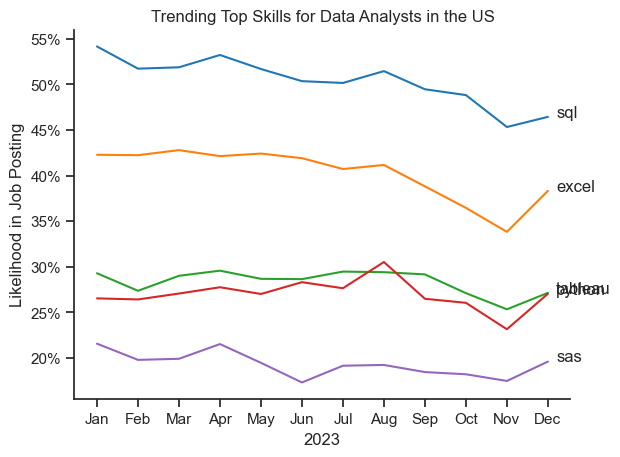

In [34]:
#Only plotting the first 5 skills - in this case the first 5 columns

df_plot = df_da_us_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter

ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])
    
plt.show()